In [231]:
### This is to load some modules that we may use in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns

## This is to view a high-resolution figure in Jupyter Notebook
%config InlineBackend.figure_format = 'retina'

In [2]:
# read raw data
df = pd.read_excel("D:/HKU-SDA/capstone/Data/统计结果.xlsx", sheet_name=0, header=1)   # file path
df.tail(3)

,dc,low_edu,poverty,non_work,inc,age_a65,age_b15,single_parent,wp_diff,lang_eng,born_ml,hs_size,hs_public,loan
16,Sai Kung,0.2955,0.2781,0.4640,20000,0.1580,0.1152,0.0962,0.6491,0.0604,0.2546,46,0.1749,13500
17,Islands,0.3019,0.2609,0.4961,18000,0.1473,0.1283,0.1123,0.6058,0.1396,0.2601,45,0.3359,13100
18,Land total,0.3550,0.2868,0.5034,18000,0.1958,0.1090,0.1196,0.5766,0.0461,0.2986,40,0.3019,12000


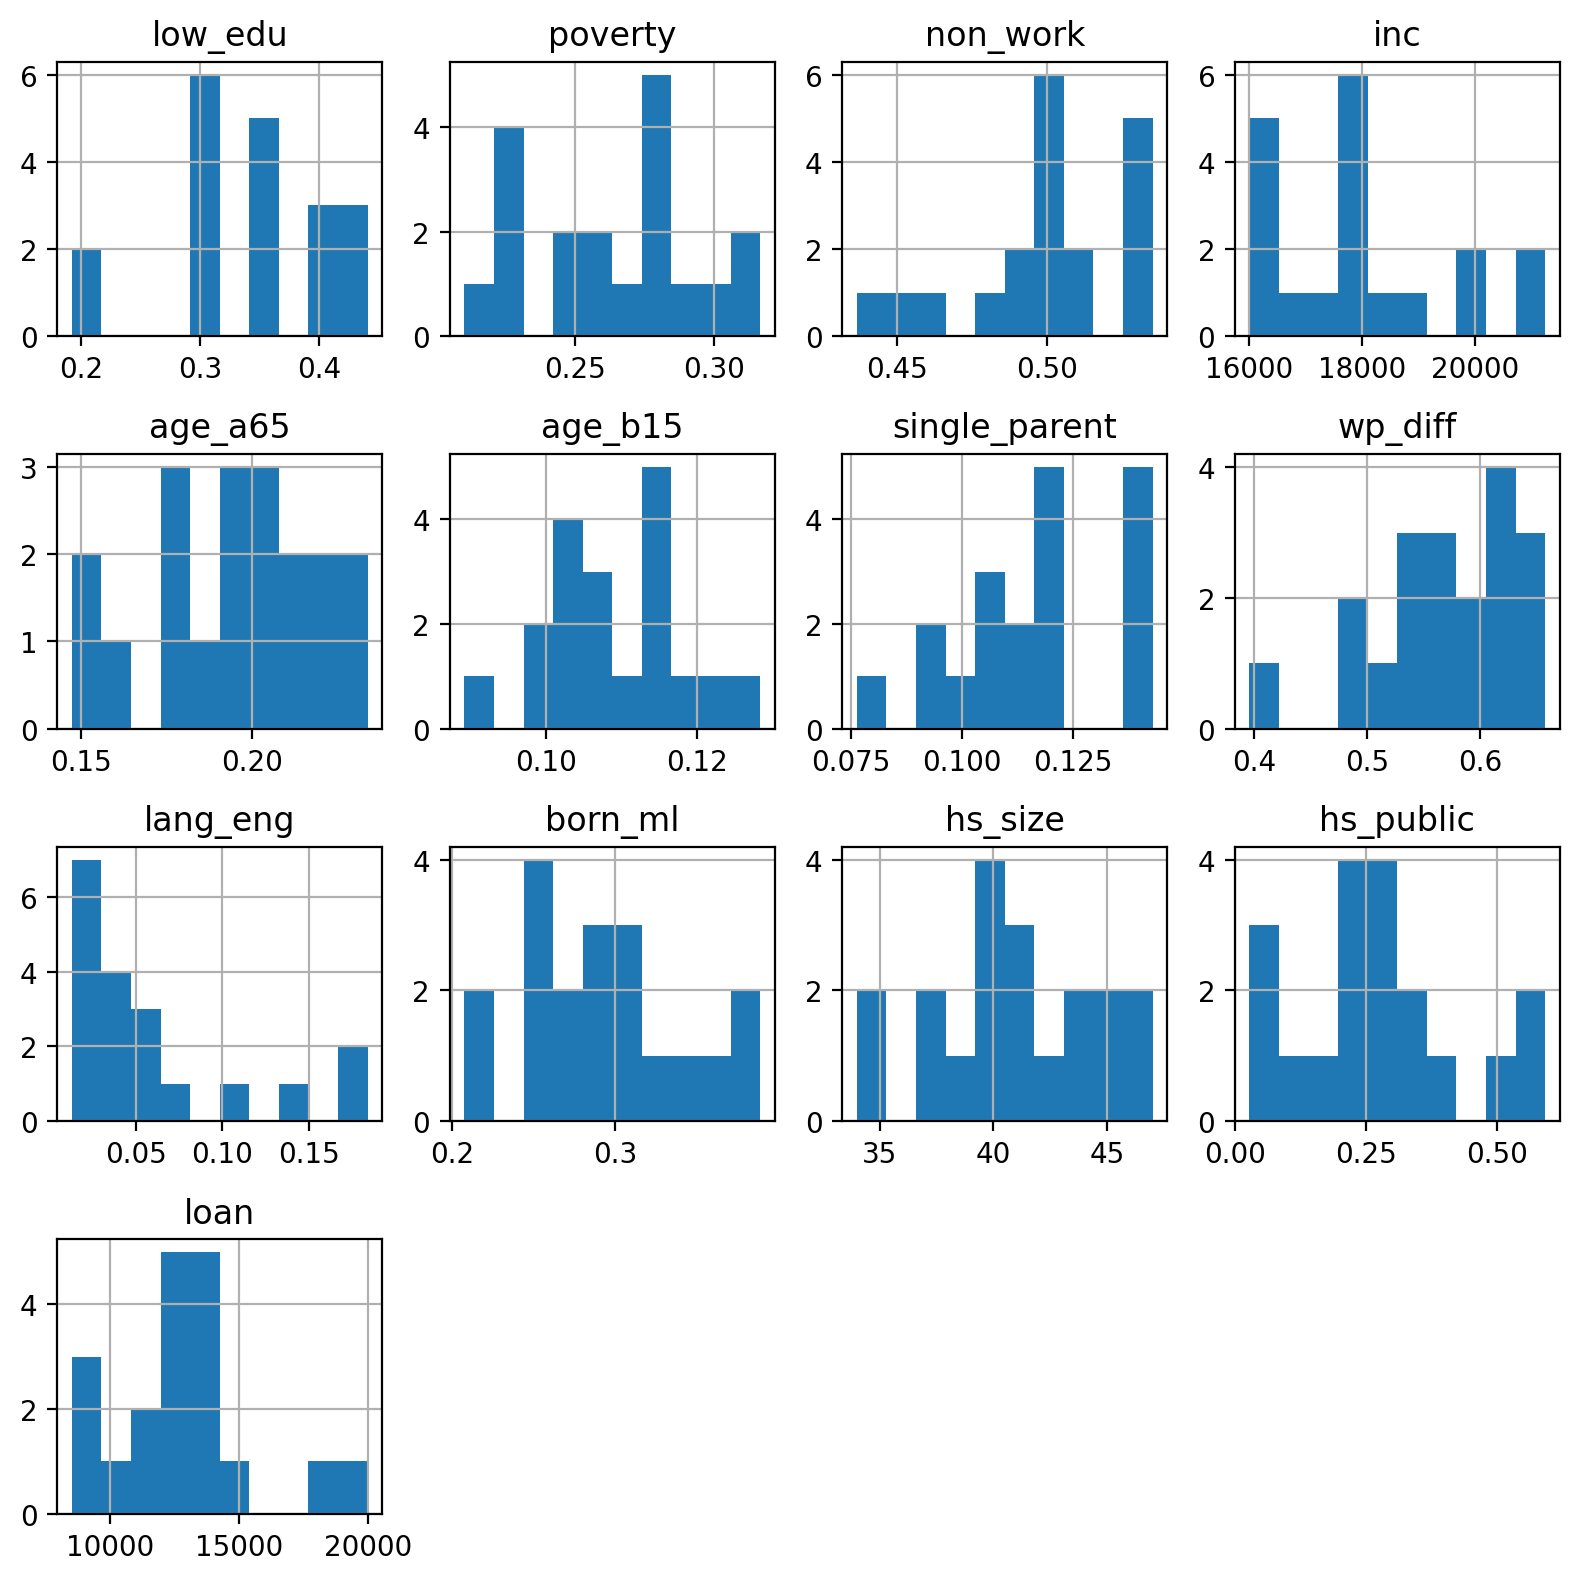

In [3]:
df_bf = df[['dc','low_edu','poverty','non_work','inc',
               'age_a65','age_b15','single_parent','wp_diff','lang_eng',
               'born_ml','hs_size','hs_public',
               'loan']]
   
df_bf=df_bf.set_index(['dc'])
df_bf = df_bf.fillna(0)
df_bf.hist(figsize=(8,8))
plt.tight_layout()
    

In [4]:
cols = df_bf.columns
for i in cols:
     if (i in ['inc','lang_eng','hs_size','household_income','loan']):  
         df_bf[i+'_rank'] = df_bf[i].rank(ascending=False)
     else:
        df_bf[i+'_rank'] = df_bf[i].rank(ascending=True)
     df_bf[i+'_rank'] = (df_bf[i+'_rank']-1)/(len(df_bf[i+'_rank'])-1)


In [6]:
df_bf

,low_edu,poverty,non_work,inc,age_a65,age_b15,single_parent,wp_diff,lang_eng,born_ml,...,inc_rank,age_a65_rank,age_b15_rank,single_parent_rank,wp_diff_rank,lang_eng_rank,born_ml_rank,hs_size_rank,hs_public_rank,loan_rank
dc,,,,,,,,,,,,,,,,,,,,,
Central and Western,0.2129,0.3168,0.4368,21250,0.1928,0.1033,0.0763,0.3960,0.1806,0.2471,...,0.000000,0.388889,0.222222,0.000000,0.000000,0.055556,0.166667,0.444444,0.055556,0.055556
Wan Chai,0.1923,0.2831,0.4467,21000,0.2122,0.1015,0.0916,0.4765,0.1839,0.2076,...,0.055556,0.722222,0.166667,0.055556,0.055556,0.000000,0.000000,0.000000,0.111111,0.000000
Eastern,0.3049,0.2597,0.4976,19000,0.2336,0.0973,0.1088,0.5317,0.0490,0.2639,...,0.222222,1.000000,0.055556,0.333333,0.277778,0.388889,0.333333,0.250000,0.333333,0.166667
Southern,0.3499,0.2486,0.4873,17000,0.2158,0.1035,0.1136,0.5123,0.1041,0.2096,...,0.722222,0.777778,0.277778,0.444444,0.166667,0.166667,0.055556,0.444444,0.555556,0.222222
Yau Tsim Mong,0.3020,0.2977,0.4762,18000,0.1789,0.1165,0.0994,0.4954,0.0758,0.3173,...,0.444444,0.166667,0.833333,0.166667,0.111111,0.222222,0.777778,0.861111,0.000000,0.277778
Sham Shui Po,0.4012,0.2302,0.5266,16000,0.2040,0.1144,0.1384,0.5945,0.0269,0.3820,...,0.888889,0.666667,0.666667,0.833333,0.611111,0.666667,0.944444,1.000000,0.833333,0.555556
Kowloon City,0.3042,0.2805,0.5033,18000,0.2008,0.1226,0.1167,0.5876,0.0624,0.3082,...,0.444444,0.611111,0.944444,0.500000,0.555556,0.277778,0.666667,0.638889,0.444444,0.111111
Wong Tai Sin,0.4336,0.2281,0.5265,16000,0.2296,0.0892,0.1366,0.6578,0.0130,0.3443,...,0.888889,0.944444,0.000000,0.777778,1.000000,1.000000,0.833333,0.777778,0.888889,1.000000
Kwun Tong,0.4231,0.2307,0.5351,16000,0.2195,0.1041,0.1430,0.5310,0.0135,0.3884,...,0.888889,0.833333,0.333333,1.000000,0.222222,0.888889,1.000000,0.944444,1.000000,0.750000


                    low_edu_rank  poverty_rank  non_work_rank  inc_rank  \
low_edu_rank            1.000000     -0.626316       0.891228  0.888939   
poverty_rank           -0.626316      1.000000      -0.571930 -0.637892   
non_work_rank           0.891228     -0.571930       1.000000  0.819253   
inc_rank                0.888939     -0.637892       0.819253  1.000000   
age_a65_rank            0.371930     -0.340351       0.364912  0.283210   
age_b15_rank           -0.331579      0.228070      -0.173684 -0.181361   
single_parent_rank      0.885965     -0.621053       0.956140  0.861243   
wp_diff_rank            0.321053     -0.401754       0.347368  0.212631   
lang_eng_rank           0.914035     -0.598246       0.873684  0.725445   
born_ml_rank            0.668421     -0.450877       0.775439  0.684349   
hs_size_rank            0.606292     -0.214765       0.660204  0.640451   
hs_public_rank          0.731579     -0.540351       0.796491  0.720978   
loan_rank               0

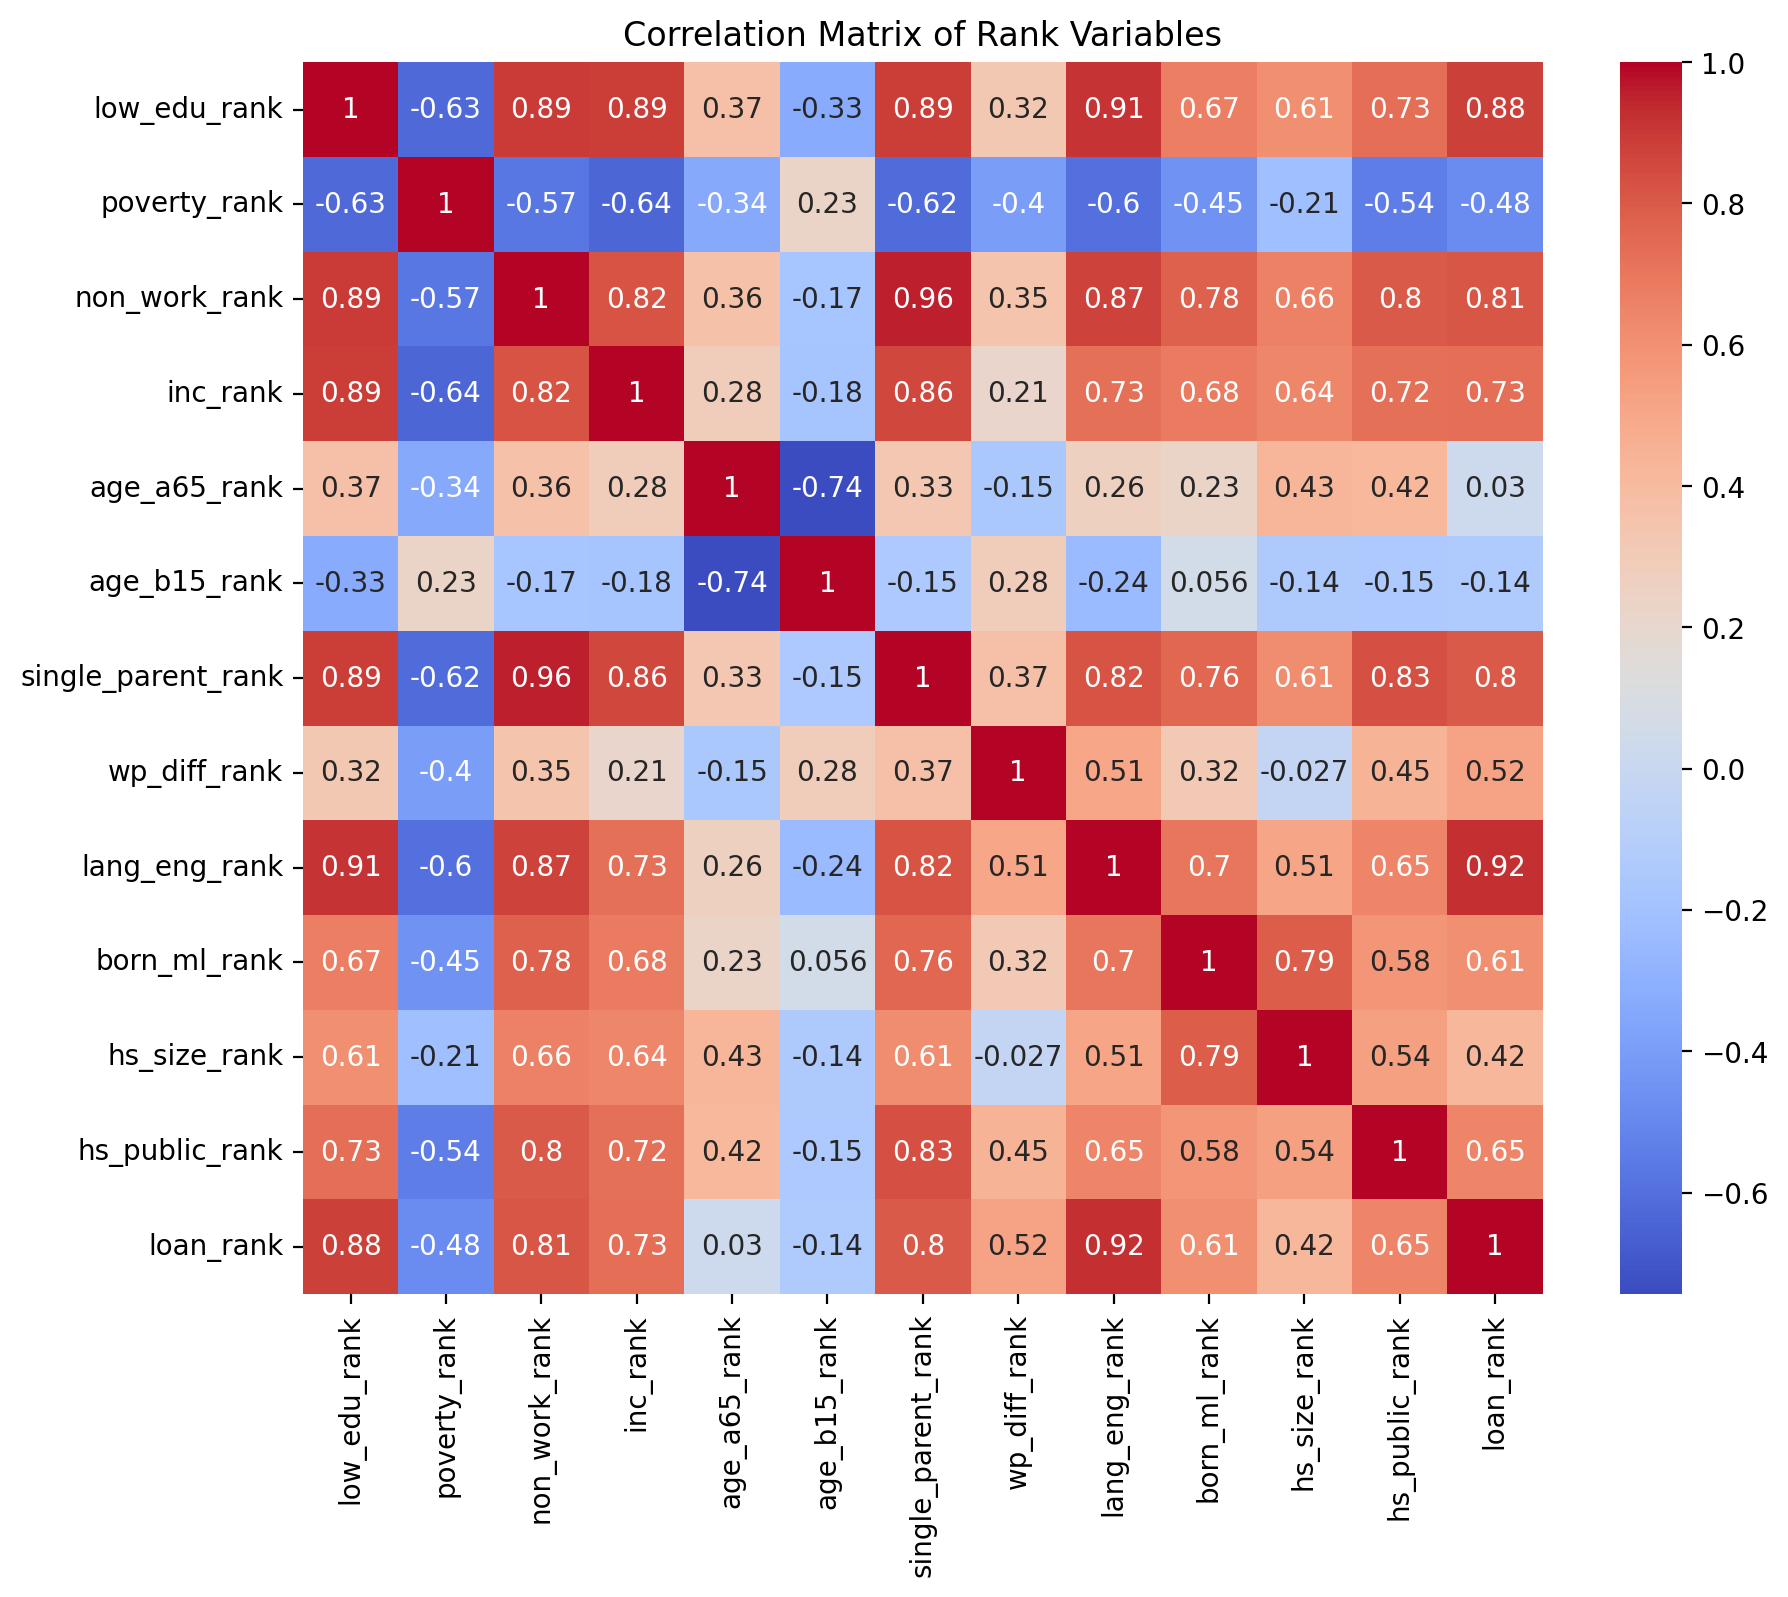

In [7]:
rank_columns = [col for col in df_bf.columns if col.endswith('_rank')]

correlation_matrix = df_bf[rank_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Rank Variables')
plt.show()

In [9]:
# “low_edu” 和 “lang_eng” 相关系数达 0.91 ，“non_work” 和 “single_parent” 相关系数为 0.96
# “age_b15”，“poverty” 与很多变量负相关

In [13]:
col_socioeconomic =[i +'_rank' for i in ['low_edu','inc']]
col_household = [i +'_rank' for i in ['age_a65','single_parent']]
col_minority_lang = [i +'_rank' for i in ['lang_eng','born_ml']]
col_housing = [i +'_rank' for i in ['hs_size','hs_public']]

In [14]:
SVI = pd.DataFrame()
SVI_count = pd.DataFrame()
SVI['sciEcoSVI_avg'] = df_bf[col_socioeconomic].mean(axis=1)
SVI['hsholdSVI_avg'] = df_bf[col_household].mean(axis=1)
SVI['minLangSVI_avg'] = df_bf[col_minority_lang].mean(axis=1)
SVI['hsingSVI_avg'] = df_bf[col_housing].mean(axis=1)

In [19]:
SVI['overallSVI_avg'] = SVI[[i for i in SVI.columns if ('SVI_avg' in i)]].sum(axis=1)

In [21]:
SVI['dc'] = SVI.index

In [23]:
print(SVI)

                     sciEcoSVI_avg  hsholdSVI_avg  minLangSVI_avg  \
dc                                                                  
Central and Western       0.027778       0.194444        0.111111   
Wan Chai                  0.027778       0.388889        0.000000   
Eastern                   0.277778       0.666667        0.361111   
Southern                  0.638889       0.611111        0.111111   
Yau Tsim Mong             0.333333       0.166667        0.500000   
Sham Shui Po              0.805556       0.750000        0.805556   
Kowloon City              0.361111       0.555556        0.472222   
Wong Tai Sin              0.916667       0.861111        0.916667   
Kwun Tong                 0.888889       0.916667        0.944444   
Kwai Tsing                0.944444       0.888889        0.916667   
Tsuen Wan                 0.263889       0.250000        0.500000   
Tuen Mun                  0.722222       0.500000        0.583333   
Yuen Long                 0.638889

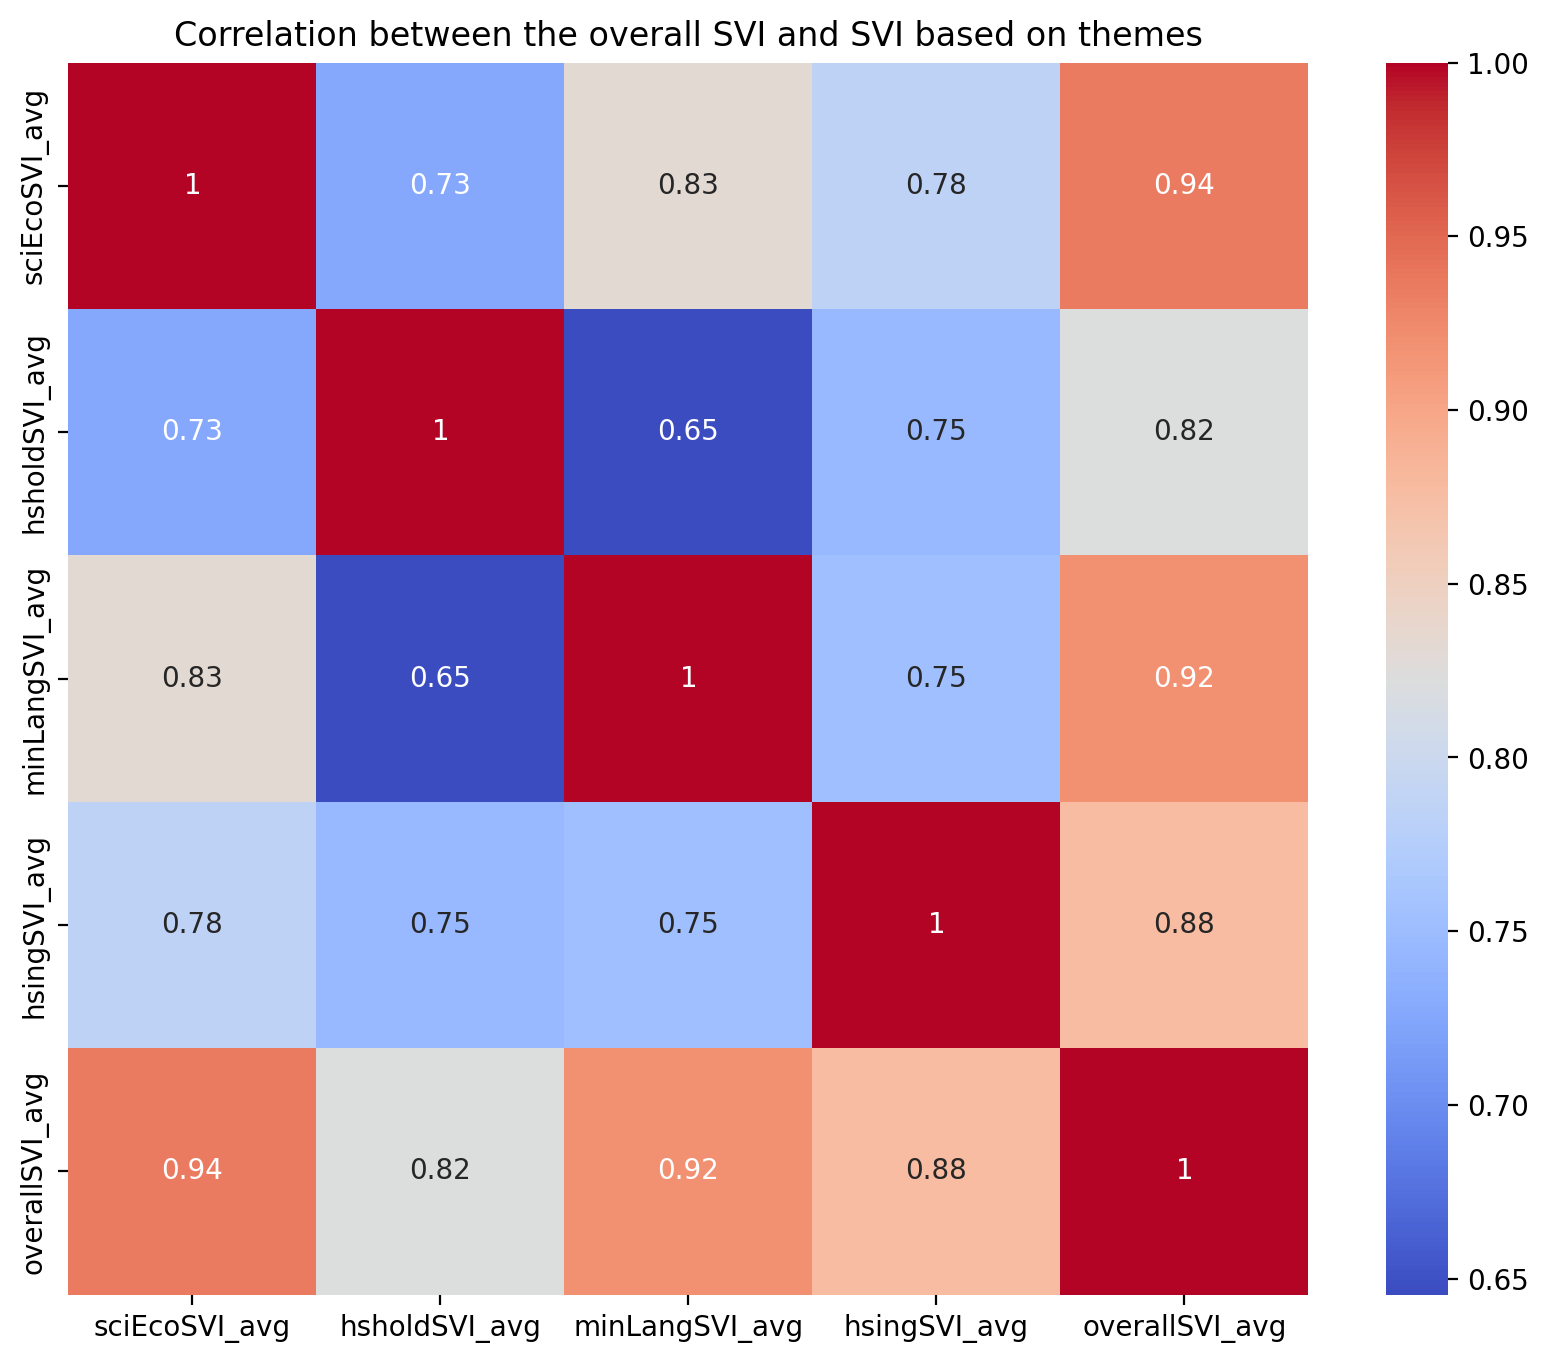

In [25]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = SVI.select_dtypes(include='number').columns
n = len(numeric_cols)
corr_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        col_i = SVI[numeric_cols[i]]
        col_j = SVI[numeric_cols[j]]
        corr, _ = spearmanr(col_i, col_j)
        corr_matrix[i, j] = corr
corr_matrix = pd.DataFrame(corr_matrix, columns=numeric_cols, index=numeric_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between the overall SVI and SVI based on themes')

# 保存图片
plt.savefig('D:/HKU-SDA/capstone/Data/spearman_correlation_heatmap.png')

# 显示图片
plt.show()

In [26]:
SVI.to_excel('D:/HKU-SDA/capstone/Data/SVI.xlsx')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer


def KMO(df):
    """
    对输入数据进行 KMO 检验和 Bartlett 球形检验，并进行因子分析和可视化
    :param df: 输入的数据 DataFrame
    """
    # 计算 Bartlett 球形检验的卡方值和 p 值
    chi_square_value, p_value = calculate_bartlett_sphericity(df)
    print('**********bartlett_sphericity chi_square_value,p_value***********')
    print(chi_square_value, p_value)
    # 计算 KMO 值
    kmo_all, kmo_model = calculate_kmo(df)
    print('**********KMO kmo_all,kmo_model***********')
    print(kmo_all)
    print(kmo_model)

    # 因子分析 - 绘制碎石图
    fa = FactorAnalyzer(15, rotation=None)
    fa.fit(df)
    ev, v = fa.get_eigenvalues()
    plt.figure()
    plt.scatter(range(1, df.shape[1] + 1), ev)
    plt.plot(range(1, df.shape[1] + 1), ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()

    # 因子分析 - 绘制因子载荷热力图
    fa = FactorAnalyzer(3, rotation="varimax")
    fa.fit(df)
    df_cm = pd.DataFrame(np.abs(fa.loadings_), index=df.columns)
    plt.figure(figsize=(12, 12))
    ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
    ax.yaxis.set_tick_params(labelsize=15)
    plt.title('Factor Analysis', fontsize='xx-large')
    plt.ylabel('Sepal Width', fontsize='xx-large')
    plt.show()


def pca_weight(eigen_val, loading, eigen_val_cum):
    """
    计算主成分的权重
    :param eigen_val: 特征值
    :param loading: 载荷矩阵
    :param eigen_val_cum: 累计方差贡献率
    :return: 主成分的权重
    """
    eiv_sqrt = np.sqrt(eigen_val)
    print('eiv_sqrt', eiv_sqrt)
    coef = loading / eiv_sqrt
    print('coef', coef)
    eigen_val_cum = eigen_val_cum * 100
    print(eigen_val_cum)
    coef_tt = np.dot(coef, eigen_val_cum) / sum(eigen_val_cum)
    print(coef_tt)
    weight = coef_tt / sum(coef_tt)
    print(weight)
    return weight


def select_n_components(df):
    """
    根据 Kaiser 准则选择合适的主成分数量
    :param df: 输入的数据 DataFrame
    :return: 合适的主成分数量
    """
    # 数据标准化
    df_scaled = scale(df.to_numpy(), with_mean=True)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

    # 创建 PCA 对象，不指定主成分数量，以便获取所有特征值
    pca = PCA()
    pca.fit(df_scaled)

    # 获取特征值
    eigenvalues = pca.explained_variance_
    print('**********特征值大小***********')
    for i, eigenvalue in enumerate(eigenvalues, start=1):
        print(f'主成分 {i}: 特征值 = {eigenvalue}')

    # 根据 Kaiser 准则选择主成分数量
    valid_components = (eigenvalues > 1).sum()
    print(f'根据 Kaiser 准则，合适的主成分数量为: {valid_components}')

    return valid_components


def cal_PCA(df):
    """
    对输入数据进行主成分分析
    :param df: 输入的数据 DataFrame
    :return: 主成分的权重
    """
    # 选择合适的主成分数量
    n = select_n_components(df)

    df_bf = df
    # 计算数据的 Spearman 相关性矩阵并绘制热力图
    df_corr = df_bf.corr(method='spearman')
    plt.figure(figsize=(12, 12))
    sns.heatmap(df_corr, annot=True)
    plt.show()

    # 绘制数据各列的直方图
    df_bf.hist(figsize=(8, 8))
    plt.tight_layout()
    plt.show()

    # 数据标准化
    df_scaled = scale(df_bf.to_numpy(), with_mean=True)
    df_scaled = pd.DataFrame(df_scaled, columns=df_bf.columns, index=df_bf.index)
    
    # 绘制标准化后的数据各列的直方图
    df_scaled.hist(figsize=(8, 8))
    plt.tight_layout()
    plt.show()

    # 进行 KMO 检验和因子分析
    KMO(df_scaled)

    # 创建 PCA 对象并拟合数据
    pca = PCA(n_components=n)
    pca.fit(df_scaled)

    # 打印主成分的方差、方差贡献率和主成分矩阵
    print('**********explained_variance***********')
    print(pca.explained_variance_)
    print('**********explained_variance_ratio***********')
    print(pca.explained_variance_ratio_)
    print('**********pcs***********')
    print(pca.components_)

    PCs = pca.components_
    loadings = pca.components_.T
    df_loadings = pd.DataFrame(loadings, columns=['ld_PC' + str(i) for i in range(len(PCs))], index=df_bf.columns)

    # 计算主成分的权重
    weight = pca_weight(pca.explained_variance_, loadings, pca.explained_variance_ratio_)
    weight = pd.DataFrame(np.array(weight).reshape(1, len(df_bf.columns)), columns=df_bf.columns)

    # 进行主成分变换
    X_decomp = pca.fit_transform(df_scaled)
    df_pca = pd.DataFrame(X_decomp, columns=['PC' + str(i) for i in range(len(PCs))], index=df_bf.index)
    print(df_pca)

    return weight


In [31]:
# 将索引重置为数字索引
# 手动创建数字索引
df_svi=df_bf[['low_edu','inc',
               'age_a65','single_parent','lang_eng',
               'born_ml','hs_size','hs_public']]

new_index = range(len(df_svi))
df_svi.index = new_index
df_svi

,low_edu,inc,age_a65,single_parent,lang_eng,born_ml,hs_size,hs_public
0,0.2129,21250,0.1928,0.0763,0.1806,0.2471,41,0.0322
1,0.1923,21000,0.2122,0.0916,0.1839,0.2076,47,0.0398
2,0.3049,19000,0.2336,0.1088,0.0490,0.2639,44,0.2009
3,0.3499,17000,0.2158,0.1136,0.1041,0.2096,41,0.2975
4,0.3020,18000,0.1789,0.0994,0.0758,0.3173,37,0.0272
5,0.4012,16000,0.2040,0.1384,0.0269,0.3820,34,0.3757
6,0.3042,18000,0.2008,0.1167,0.0624,0.3082,40,0.2369
7,0.4336,16000,0.2296,0.1366,0.0130,0.3443,38,0.4977
8,0.4231,16000,0.2195,0.1430,0.0135,0.3884,35,0.5928
9,0.4411,16000,0.2208,0.1393,0.0134,0.3589,37,0.5716


**********特征值大小***********
主成分 1: 特征值 = 5.805790194680637
主成分 2: 特征值 = 1.1023141812754476
主成分 3: 特征值 = 0.6300828457122075
主成分 4: 特征值 = 0.4052936484687218
主成分 5: 特征值 = 0.3000331328288869
主成分 6: 特征值 = 0.15004678422593445
主成分 7: 特征值 = 0.03475184417956665
主成分 8: 特征值 = 0.01613181307304544
根据 Kaiser 准则，合适的主成分数量为: 2


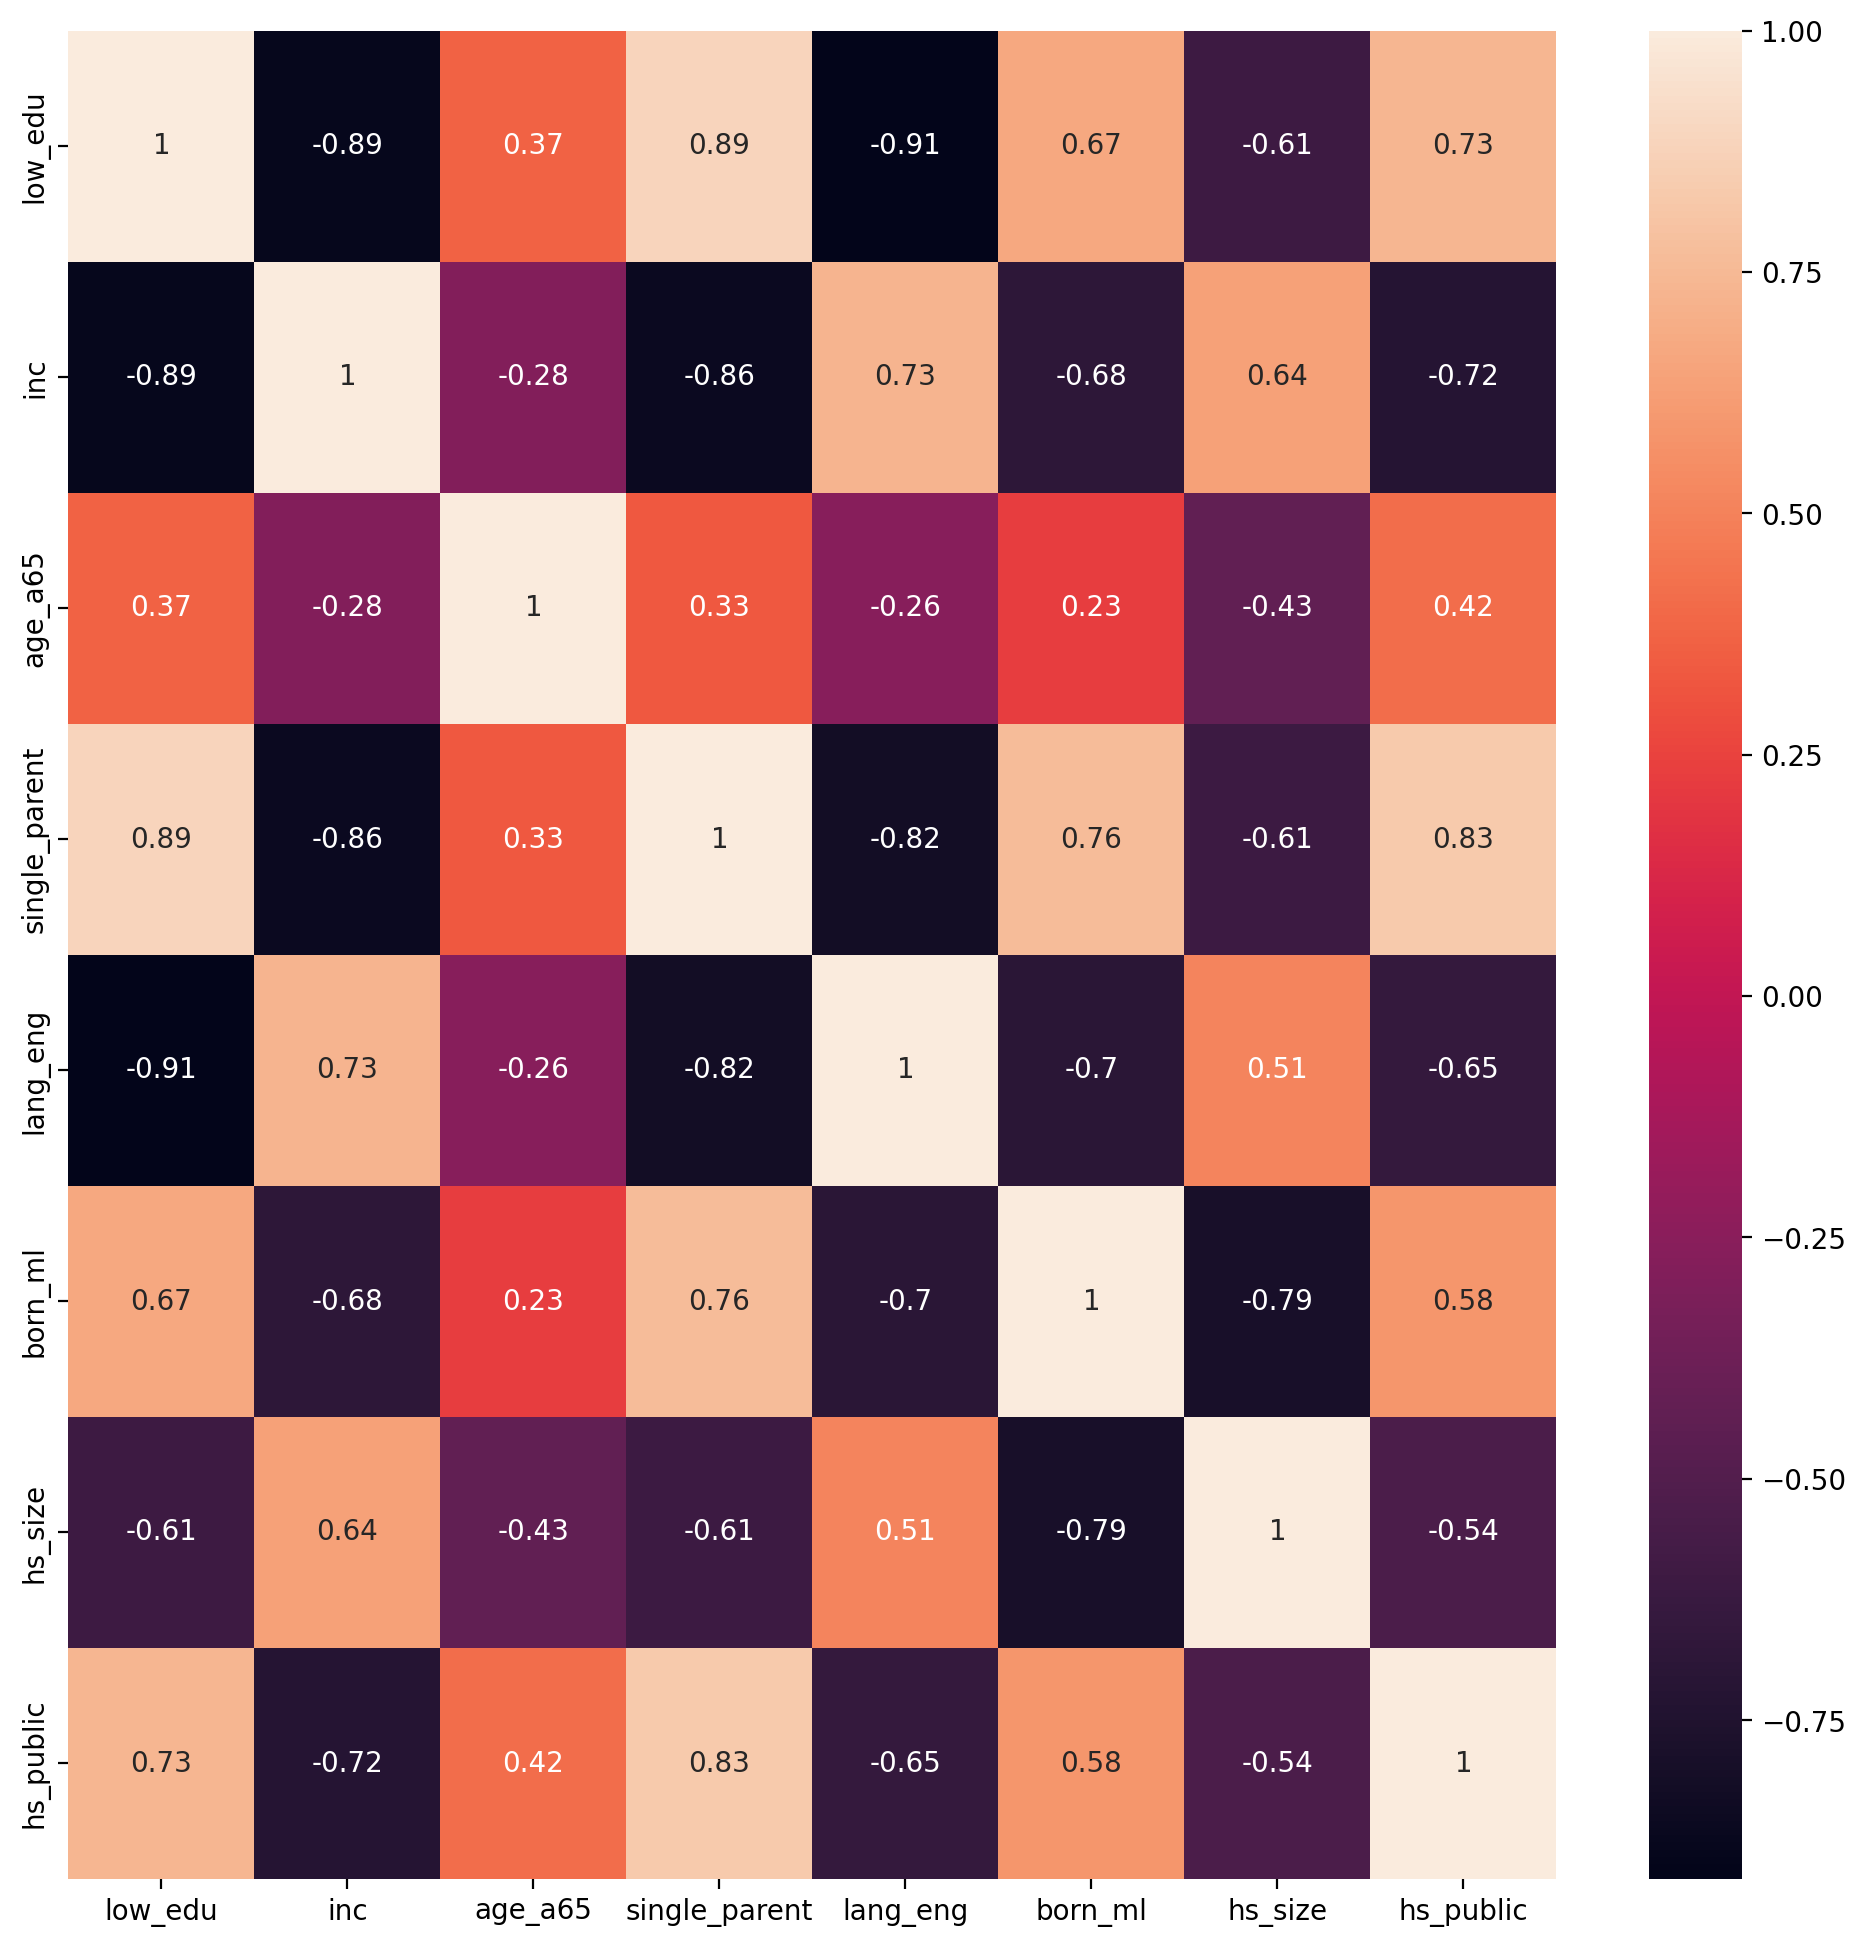

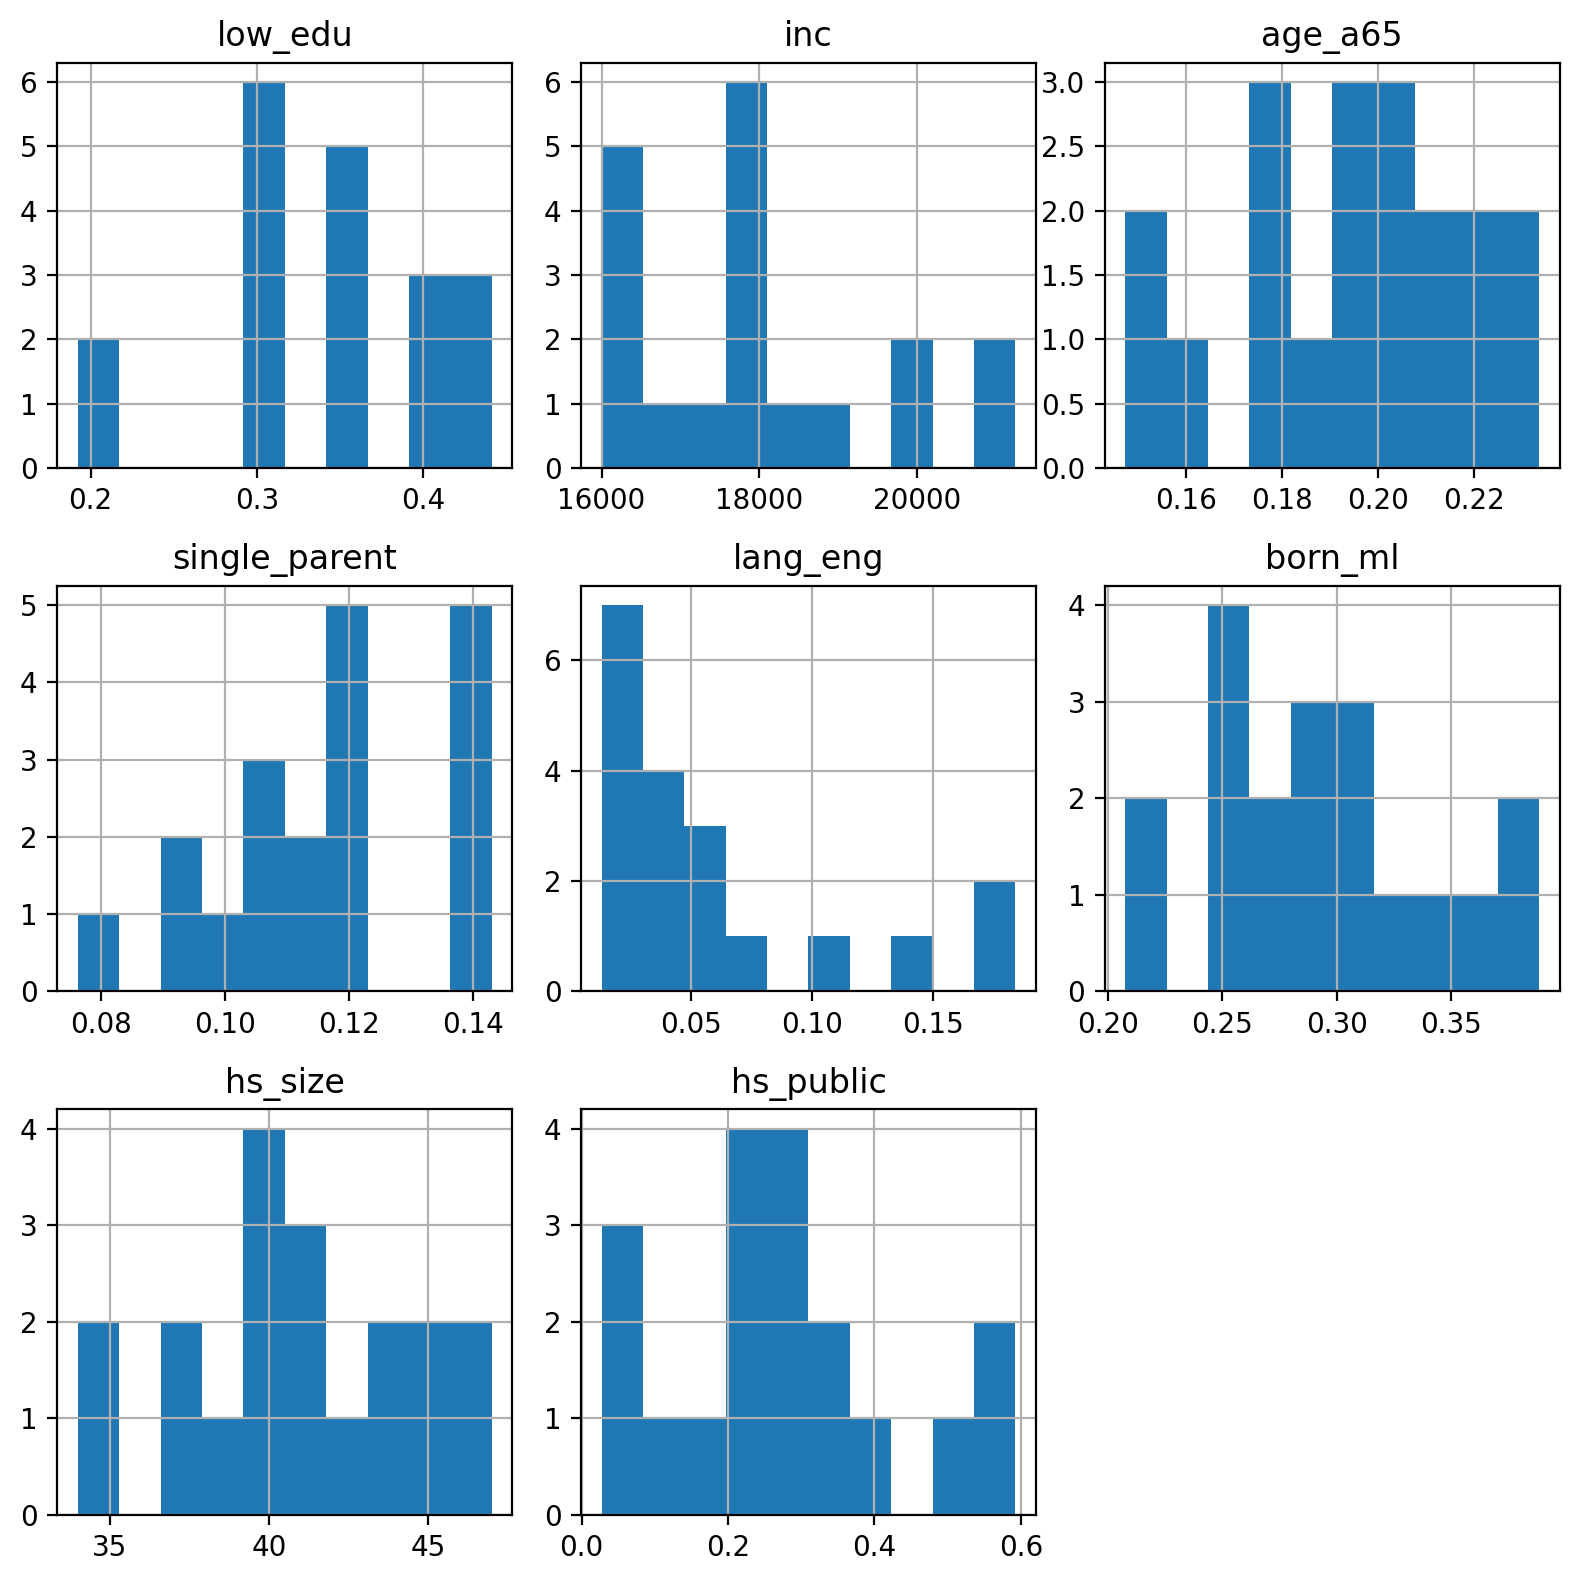

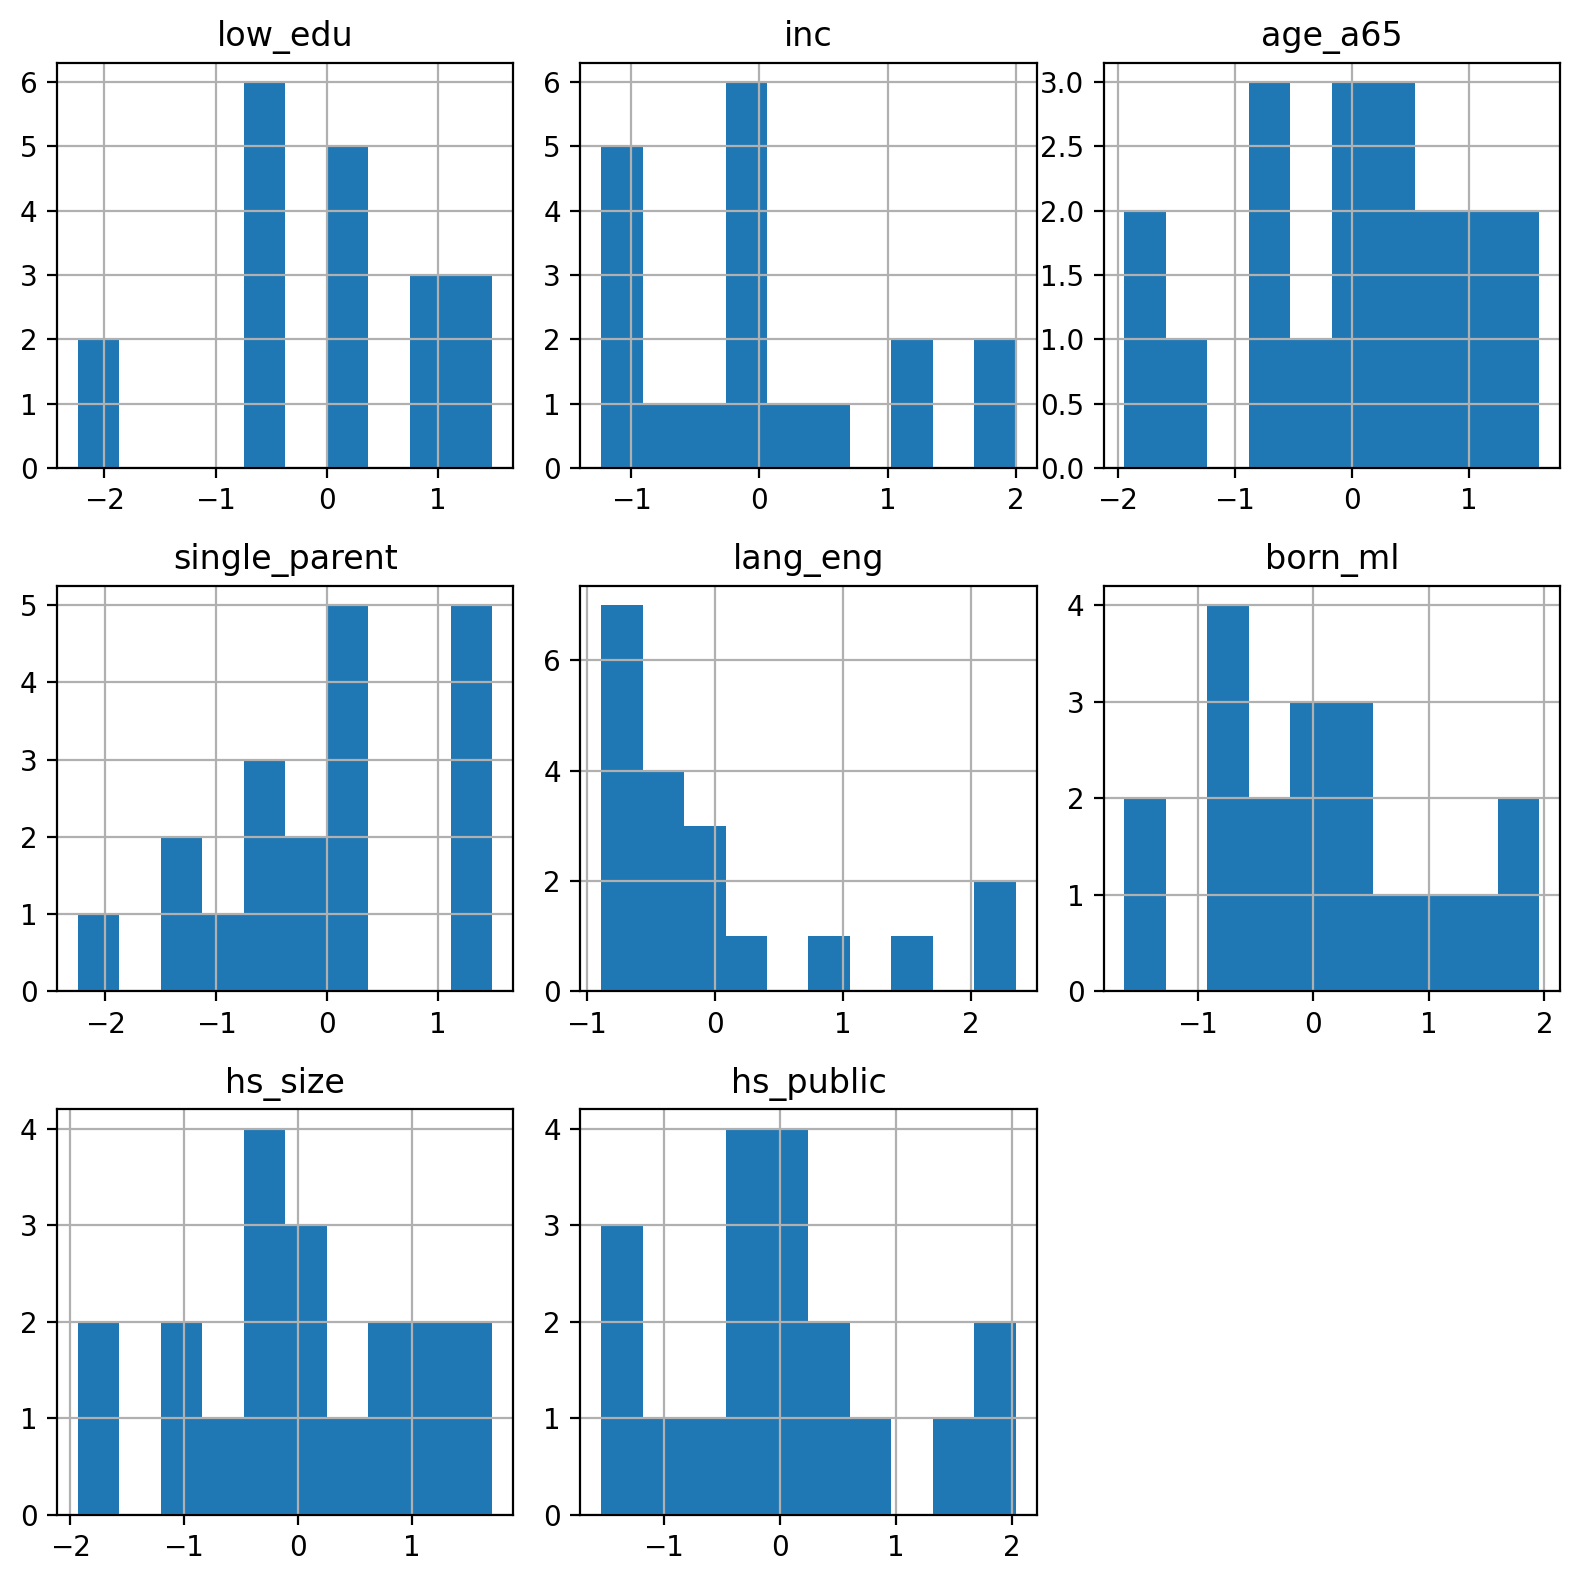

**********bartlett_sphericity chi_square_value,p_value***********
152.66285542648856 4.076382050978871e-19
**********KMO kmo_all,kmo_model***********
[0.65592773 0.72023855 0.37892588 0.78908116 0.58867921 0.64335445
 0.60665701 0.65437895]
0.6548189015247583


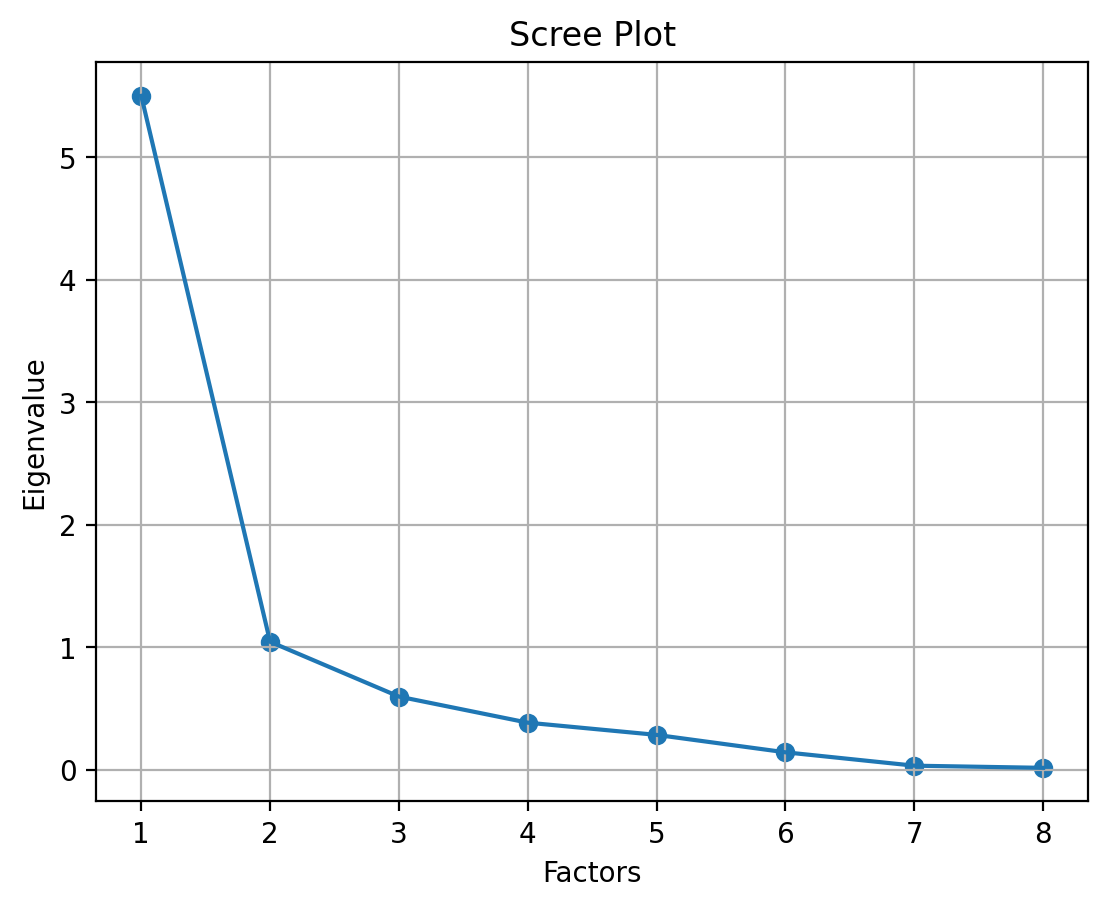

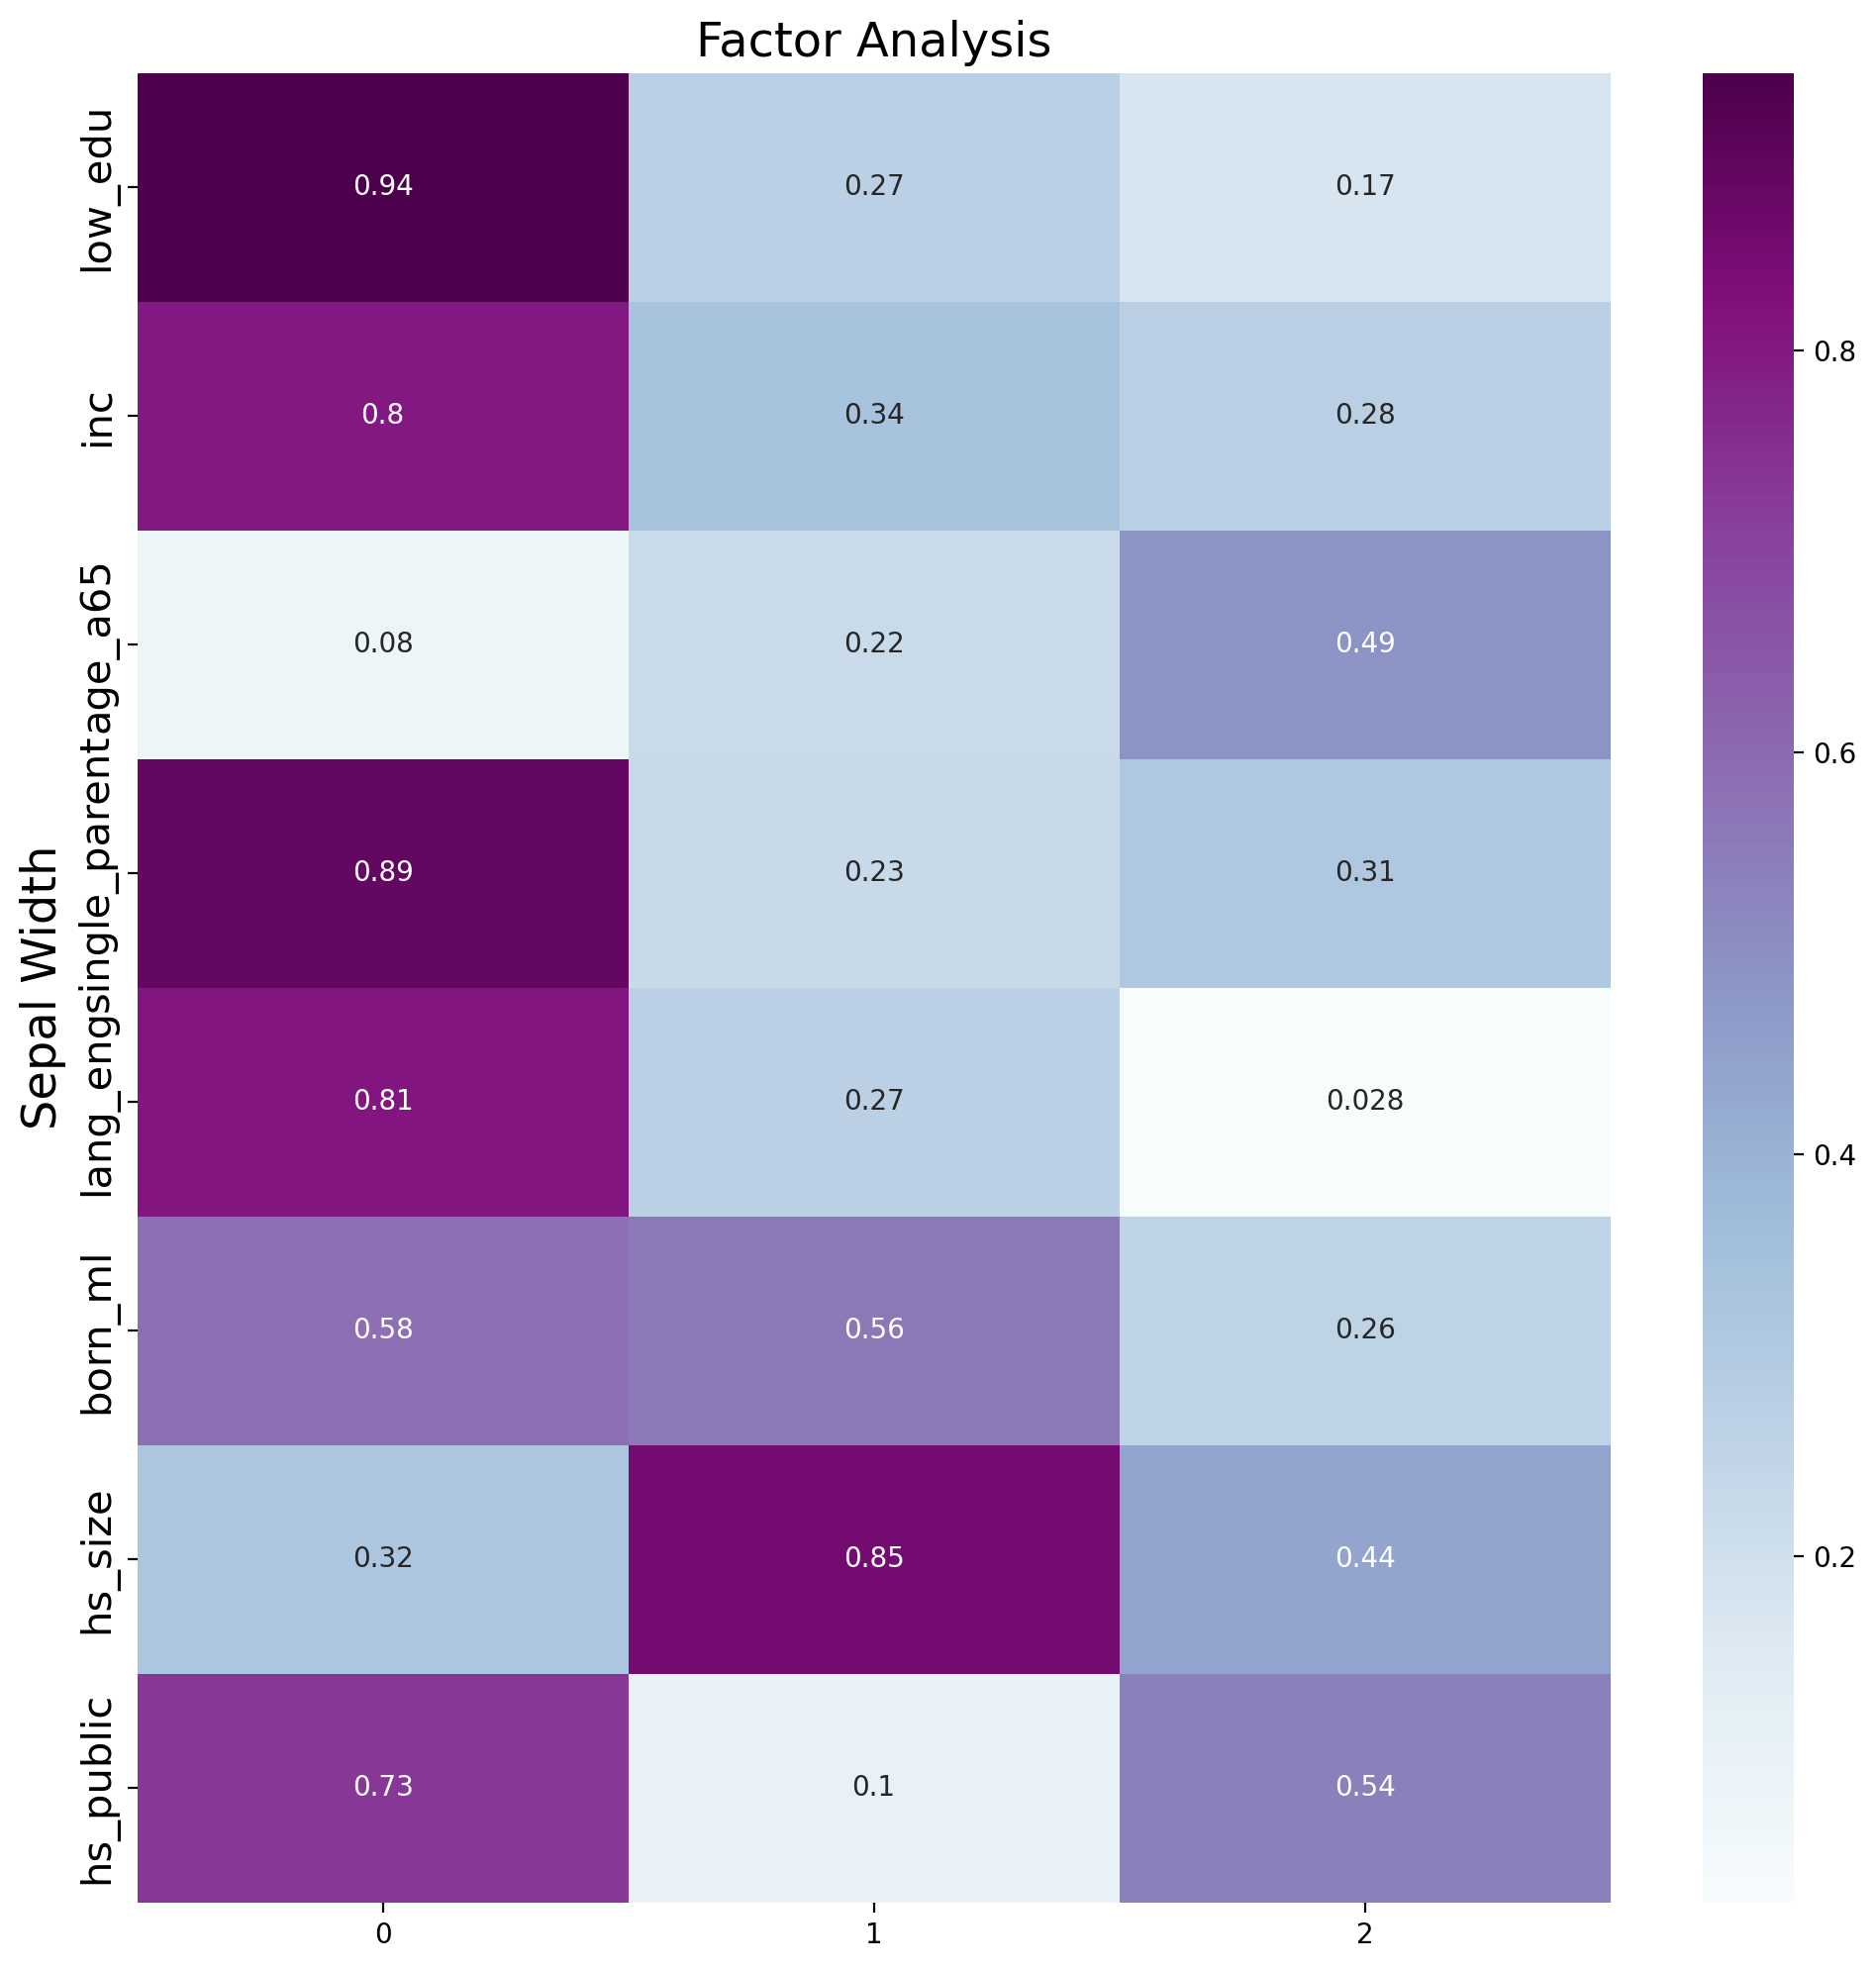

**********explained_variance***********
[5.80579019 1.10231418]
**********explained_variance_ratio***********
[0.68752779 0.13053721]
**********pcs***********
[[ 0.40458544 -0.39354408  0.1597479   0.40275412 -0.34557774  0.36203223
  -0.33061806  0.36592867]
 [-0.19860774  0.10468296  0.83447482 -0.13396052  0.30891806  0.06537531
  -0.36810679  0.00979206]]
eiv_sqrt [2.40952074 1.04991151]
coef [[ 0.16791117 -0.18916617]
 [-0.16332878  0.09970646]
 [ 0.06629862  0.79480491]
 [ 0.16715113 -0.1275922 ]
 [-0.14342178  0.29423247]
 [ 0.15025072  0.06226744]
 [-0.1372132  -0.35060745]
 [ 0.15186782  0.00932656]]
[68.75277862 13.05372057]
[ 0.11093296 -0.1213567   0.1825451   0.12011945 -0.07358605  0.13621138
 -0.17126415  0.12912276]
[ 0.35473034 -0.38806235  0.58372449  0.384106   -0.23530613  0.43556317
 -0.5476514   0.41289588]
         PC0       PC1
0  -4.144620  1.455469
1  -4.580055  1.399710
2  -0.946418  1.143414
3  -0.447140  0.801916
4  -0.836548  0.221665
5   3.163234  0.49362

In [17]:
# 调用 cal_PCA 函数进行主成分分析
weights = cal_PCA(df_svi)

# 输出主成分权重
print("主成分权重：")
print(weights)

In [19]:
weights = abs(weights)
weights = weights/sum(weights.values[0])
print(weights)

    low_edu       inc   age_a65  single_parent  lang_eng   born_ml   hs_size  \
0  0.106142  0.116115  0.174661       0.114932  0.070408  0.130329  0.163867   

   hs_public  
0   0.123546  


In [21]:
weights

,low_edu,inc,age_a65,single_parent,lang_eng,born_ml,hs_size,hs_public
0,0.106142,0.116115,0.174661,0.114932,0.070408,0.130329,0.163867,0.123546


In [23]:
percentile_ranks = df_bf[rank_columns]

weights_df = pd.DataFrame({
    'weights': [0.106142, 0.116115, 0.174661, 0.114932, 0.070408, 0.130329, 0.163867, 0.123546]
}, index=['low_edu_rank', 'inc_rank', 'age_a65_rank', 'single_parent_rank', 'lang_eng_rank', 'born_ml_rank', 'hs_size_rank', 'hs_public_rank'])

# 变量分类

variable_categories = {
    'sciEcoSVI': ['low_edu_rank', 'inc_rank'],
    'hsholdSVI': ['age_a65_rank',  'single_parent_rank'],
    'minLangSVI': ['lang_eng_rank', 'born_ml_rank'],
    'hsingSVI': ['hs_size_rank', 'hs_public_rank']
}


category_svi = pd.DataFrame(index=percentile_ranks.index)

# 计算不同类别的 SVI
for category, variables in variable_categories.items():
    weights = weights_df.loc[variables, 'weights']
    category_svi[category] = (percentile_ranks[variables] * weights).sum(axis=1)

# 计算总的 SVI
category_svi['totalSVI'] = category_svi.sum(axis=1)
category_svi

,sciEcoSVI,hsholdSVI,minLangSVI,hsingSVI,totalSVI
dc,,,,,
Central and Western,0.005897,0.067924,0.025633,0.079693,0.179147
Wan Chai,0.006451,0.132529,0.000000,0.013727,0.152707
Eastern,0.061184,0.212972,0.070824,0.082149,0.427128
Southern,0.142829,0.186928,0.018975,0.141466,0.490199
Yau Tsim Mong,0.075194,0.048266,0.117013,0.141108,0.381580
Sham Shui Po,0.179871,0.212217,0.170027,0.266822,0.828938
Kowloon City,0.081091,0.164203,0.106444,0.159602,0.511340
Wong Tai Sin,0.203459,0.254349,0.179015,0.237271,0.874094
Kwun Tong,0.197562,0.260483,0.192914,0.278309,0.929268


In [27]:
category_svi.to_excel('D:/HKU-SDA/capstone/Data/weighted-svi(2).xlsx')

In [233]:
df =pd.read_csv("D:/HKU-SDA/capstone/Data/Code/0405_DF_dp_idp_coor_vars_poi_category_number2.csv")
df.head()

,SVI_avg,stay_inv_work,Food_Market,Retail_Life_Service,Hospital,Recreation,Tourist_Attraction,Transportation_Service,Date,t,...,x,y,x1,y1,District,overallSVI_avg,sciEcoSVI,hsholdSVI,minLangSVI,hsingSVI
0,0.294118,0.002875,884.342857,2899.825714,24,694.880000,180.948571,517.398571,2022/1/30,7,...,114.144021,22.284968,12706454.29,2545773.609,Central and Western,0.179147,0.005897,0.067924,0.025633,0.079693
1,0.294118,0.005191,795.864286,2736.578571,24,622.160000,177.125714,435.218571,2022/2/6,14,...,114.144021,22.284968,12706454.29,2545773.609,Central and Western,0.179147,0.005897,0.067924,0.025633,0.079693
2,0.294118,0.003900,777.314286,2699.522857,24,607.154286,177.762857,437.734286,2022/2/13,21,...,114.144021,22.284968,12706454.29,2545773.609,Central and Western,0.179147,0.005897,0.067924,0.025633,0.079693
3,0.294118,0.004631,730.200000,2618.748571,24,567.908571,152.914286,412.577143,2022/2/20,28,...,114.144021,22.284968,12706454.29,2545773.609,Central and Western,0.179147,0.005897,0.067924,0.025633,0.079693
4,0.294118,0.005777,661.642857,2467.592857,24,513.657143,126.791429,376.518571,2022/2/27,35,...,114.144021,22.284968,12706454.29,2545773.609,Central and Western,0.179147,0.005897,0.067924,0.025633,0.079693


In [307]:
covid_cum=df.groupby(['District','t'])['covid_new'].sum().rename('covid_cum')
df2=covid_cum.reset_index()
df2['week']=df2['t']//7
df2

,District,t,covid_cum,week
0,Central and Western,7,17.298,1
1,Central and Western,14,112.050,2
2,Central and Western,21,927.537,3
3,Central and Western,28,1894.750,4
4,Central and Western,35,4847.310,5
...,...,...,...,...
139,Yuen Long,28,10335.000,4
140,Yuen Long,35,25852.320,5
141,Yuen Long,42,11510.689,6
142,Yuen Long,49,4442.612,7


In [309]:
# 使用 pivot 方法进行转换
pivoted_df = df2.pivot(index='District', columns='week', values='covid_cum')

# 重命名列名
pivoted_df.columns = [f'covid_cum_{col}' for col in pivoted_df.columns]

# 重置索引
pivoted_df = pivoted_df.reset_index()
pivoted_df.tail()

,District,covid_cum_1,covid_cum_2,covid_cum_3,covid_cum_4,covid_cum_5,covid_cum_6,covid_cum_7,covid_cum_8
13,Tuen Mun,91.295,479.325,1355.631,4995.250,18312.060,12897.519,5381.192,2235.566
14,Wan Chai,9.610,74.700,523.226,1291.875,3500.835,1386.830,688.292,299.893
15,Wong Tai Sin,101.866,385.950,1450.763,4995.250,20197.125,9569.127,4818.044,1908.410
16,Yau Tsim Mong,37.479,404.625,1997.772,6373.250,15888.405,5269.954,1814.588,708.838
17,Yuen Long,47.089,821.700,2830.177,10335.000,25852.320,11510.689,4442.612,2099.251


In [311]:
df3=df[['District','overallSVI_avg', 'sciEcoSVI','hsholdSVI','minLangSVI','hsingSVI']]
df3=df3.drop_duplicates(subset=['District'])
df3.tail()

,District,overallSVI_avg,sciEcoSVI,hsholdSVI,minLangSVI,hsingSVI
104,Tuen Mun,0.593945,0.159965,0.141478,0.105445,0.187057
112,Wan Chai,0.152707,0.006451,0.132529,0.000000,0.013727
120,Wong Tai Sin,0.874094,0.203459,0.254349,0.179015,0.237271
128,Yau Tsim Mong,0.381580,0.075194,0.048266,0.117013,0.141108
136,Yuen Long,0.435833,0.141720,0.086325,0.123255,0.084532


In [313]:
merged_df= pd.merge(df3, pivoted_df, on='District', how='left')
merged_df.tail()

,District,overallSVI_avg,sciEcoSVI,hsholdSVI,minLangSVI,hsingSVI,covid_cum_1,covid_cum_2,covid_cum_3,covid_cum_4,covid_cum_5,covid_cum_6,covid_cum_7,covid_cum_8
13,Tuen Mun,0.593945,0.159965,0.141478,0.105445,0.187057,91.295,479.325,1355.631,4995.250,18312.060,12897.519,5381.192,2235.566
14,Wan Chai,0.152707,0.006451,0.132529,0.000000,0.013727,9.610,74.700,523.226,1291.875,3500.835,1386.830,688.292,299.893
15,Wong Tai Sin,0.874094,0.203459,0.254349,0.179015,0.237271,101.866,385.950,1450.763,4995.250,20197.125,9569.127,4818.044,1908.410
16,Yau Tsim Mong,0.381580,0.075194,0.048266,0.117013,0.141108,37.479,404.625,1997.772,6373.250,15888.405,5269.954,1814.588,708.838
17,Yuen Long,0.435833,0.141720,0.086325,0.123255,0.084532,47.089,821.700,2830.177,10335.000,25852.320,11510.689,4442.612,2099.251


In [329]:
import matplotlib.colors as mcolors

# 提取所需的横、纵坐标列
y_columns = ['overallSVI_avg', 'sciEcoSVI', 'hsholdSVI', 'minLangSVI', 'hsingSVI']
x_columns = ['covid_cum_1', 'covid_cum_2', 'covid_cum_3', 'covid_cum_4',
             'covid_cum_5', 'covid_cum_6', 'covid_cum_7', 'covid_cum_8']

# 计算相关系数矩阵
subset_df = merged_df[x_columns + y_columns]
correlation_matrix = subset_df.corr().loc[y_columns, x_columns]


# 调整图形尺寸，使纵坐标更窄，形成长方形
fig=plt.figure(figsize=(10, 6),dpi=600)

# 获取取反的 viridis 颜色映射
cmap = 'viridis_r'

# 绘制热力图
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=0.25, vmax=0.85,
            linewidths=1.2, linecolor='white', annot_kws={'size': 12})  # 适当减小标注字体大小
plt.title('Correlation between social vulnerability indicators \n and the number of confirmed cases', fontsize=14, weight="bold", pad=20)
plt.xlabel('COVID-19 Confrimed Cases', fontsize=12)  # 增大 x 轴标签字体大小
plt.xticks(rotation=30)
plt.ylabel('SVI Variables', fontsize=12)  # 增大 y 轴标签字体大小

# 调整标题和图片之间的距离
plt.subplots_adjust(top=0.6)


# 设置 y 轴标签横着显示
plt.yticks(rotation=0)

# 显示图形
# plt.tight_layout()
plt.show()

path='D:/HKU-SDA/capstone/Data/code/'
fig.savefig(path+'correlation.png', dpi=600, bbox_inches='tight')